### Contents
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
    Retail price vs sales price
    Retail price (220 and higher) vs sale price
    Days since release vs sale price
    Days since release (first 6 months) vs sale price

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
df = pd.read_pickle(r"C:\Users\Hello\Desktop\Tech sales data\02 Data\Prepared Data/tech_cleaned3.pkl")

### 2. Data Cleaning

In [4]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order_date_&_time,Town,Zip code,State,hour,Date,Pricing Category,Total_units
0,1,141234.0,iPhone,1.0,700.00,01/22/19 21:25,Boston,2215.0,Massachusetts,21.0,2019-01-22,Mid-Priced,22528.0
1,2,141235.0,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,Portland,97035.0,Oregon,14.0,2019-01-28,Low-priced,11303.0
2,3,141236.0,Wired Headphones,2.0,11.99,01/17/19 13:33,San Francisco,94016.0,California,13.0,2019-01-17,Low-priced,83528.0
3,4,141237.0,27in FHD Monitor,1.0,149.99,01/05/2019 20:33,Los Angeles,90001.0,California,20.0,2019-01-05,Low-priced,83528.0
4,5,141238.0,Wired Headphones,1.0,11.99,01/25/19 11:59,Austin,73301.0,Texas,11.0,2019-01-25,Low-priced,27883.0


In [5]:
df.shape

(185950, 13)

In [6]:
# Check for missing values
df.isnull().sum()

Unnamed: 0           0
Order ID             0
Product              0
Quantity Ordered     0
Price Each           0
Order_date_&_time    0
Town                 0
Zip code             0
State                0
hour                 0
Date                 0
Pricing Category     0
Total_units          0
dtype: int64

C:\Users\Hello\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price Each', ylabel='Density'>

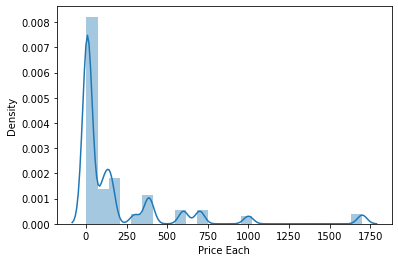

In [7]:
# Check for extreme values
sns.distplot(df['Price Each'],bins = 25, kde = True)

In [8]:
# Check Mean
df['Price Each'].mean()

184.39973476700638

In [9]:
# Check median
df['Price Each'].median()

14.95

In [10]:
# Check max
df['Price Each'].max()

1700.0

In [11]:
# Check min
df['Price Each'].min()

2.99

In [12]:
df['Price Each'].max()-df['Price Each'].min()

1697.01

In [13]:
df.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Zip code,hour,Total_units
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,92975.500000,230417.569379,1.124383,184.399735,63877.518935,14.413305,46535.870573
std,53679.285615,51512.737110,0.442793,332.731330,37776.308300,5.423416,30601.836118
min,1.000000,141234.000000,1.000000,2.990000,2215.000000,0.000000,2750.000000
25%,46488.250000,185831.250000,1.000000,11.950000,10001.000000,11.000000,22528.000000
50%,92975.500000,230367.500000,1.000000,14.950000,90001.000000,15.000000,27932.000000
75%,139462.750000,275035.750000,1.000000,150.000000,94016.000000,19.000000,83528.000000
max,185950.000000,319670.000000,9.000000,1700.000000,98101.000000,23.000000,83528.000000


### Data prep for regression analysis

#### Hypothesis 1: More items will be ordered if the unit price is low.

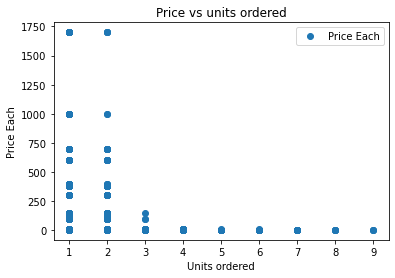

In [14]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Quantity Ordered', y='Price Each',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price vs units ordered')  
plt.xlabel('Units ordered')  
plt.ylabel('Price Each')  
plt.show()

In [15]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Quantity Ordered'].values.reshape(-1,1)
y = df['Price Each'].values.reshape(-1,1)

In [16]:
X

array([[1.],
       [1.],
       [2.],
       ...,
       [1.],
       [1.],
       [1.]])

In [17]:
y

array([[700.  ],
       [ 14.95],
       [ 11.99],
       ...,
       [400.  ],
       [ 11.99],
       [ 99.99]])

In [18]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)


### 4. Regression Analysis

In [19]:
# Create regression object
regression = LinearRegression()

In [20]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

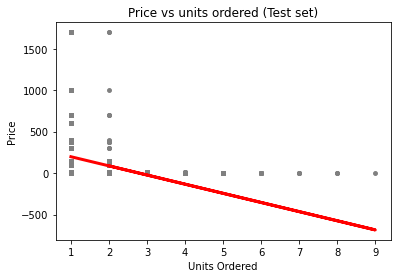

In [22]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs units ordered (Test set)')
plot_test.xlabel('Units Ordered')
plot_test.ylabel('Price')
plot_test.show()

#### The line does not fit the data very well.  This can be seen by the distance of the data points to the line. Indicating we do not have a linear relationship between the variables with only a slight corilation between 3 and 4 units

In [23]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [24]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-110.44997937]]
Mean squared error:  108699.9100536253
R2 score:  0.02224243892473199


In [25]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,379.99,197.588359
1,389.99,197.588359
2,11.99,197.588359
3,3.84,197.588359
4,99.99,197.588359
5,99.99,197.588359
6,11.95,197.588359
7,300.00,197.588359
8,150.00,197.588359
9,11.95,197.588359


#### The summary statistics of the model confirm that the model is inaccurate.  Which can also be seen by the variance in the actual vs prdicted values.  An R2 score of 0.022242 indicates a very poor fit and the large MSE also confirms this.  The slope of --110.44997937 shows that as price increases quantity ordered drops.

#### Compare how the regression fits the training set

In [26]:
# Predict on the training set

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [27]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [28]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-110.44997937]]
Mean squared error:  108094.4861649367
R2 score:  0.021856326305048634


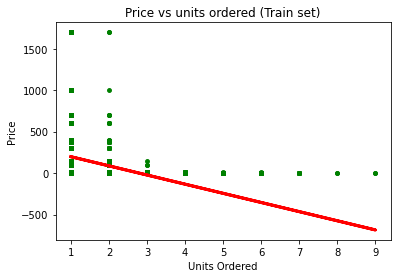

In [29]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price vs units ordered (Train set)')
plot_test.xlabel('Units Ordered')
plot_test.ylabel('Price')
plot_test.show()

#### The models outcome on the training set is very similar to that on the test set.  With the MSE being even larger on the train set.  Confirming that this is not a good model to use.  This proves that the original retail price is not the driving factor of sale price. 

### Regression on df of quantity ordered 4 and higher

In [30]:
df2 = df[df['Quantity Ordered']>=4]
df2

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order_date_&_time,Town,Zip code,State,hour,Date,Pricing Category,Total_units
103,104,141335.0,AAA Batteries (4-pack),5.0,2.99,01/12/2019 18:16,Los Angeles,90001.0,California,18.0,2019-01-12,Low-priced,83528.0
401,402,141625.0,AAA Batteries (4-pack),4.0,2.99,01/29/19 08:48,Boston,2215.0,Massachusetts,8.0,2019-01-29,Low-priced,22528.0
664,665,141881.0,AAA Batteries (4-pack),7.0,2.99,01/19/19 16:36,Seattle,98101.0,Washington,16.0,2019-01-19,Low-priced,16553.0
953,954,142146.0,AAA Batteries (4-pack),4.0,2.99,01/02/2019 17:39,New York City,10001.0,New York,17.0,2019-01-02,Low-priced,27932.0
976,977,142169.0,AAA Batteries (4-pack),4.0,2.99,01/15/19 21:39,New York City,10001.0,New York,21.0,2019-01-15,Low-priced,27932.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185377,185378,319117.0,AAA Batteries (4-pack),4.0,2.99,12/05/2019 20:30,Los Angeles,90001.0,California,20.0,2019-12-05,Low-priced,83528.0
185647,185648,319376.0,AAA Batteries (4-pack),4.0,2.99,12/06/2019 21:39,Dallas,75001.0,Texas,21.0,2019-12-06,Low-priced,27883.0
185653,185654,319382.0,AAA Batteries (4-pack),4.0,2.99,12/30/19 06:51,Los Angeles,90001.0,California,6.0,2019-12-30,Low-priced,83528.0
185790,185791,319517.0,AA Batteries (4-pack),5.0,3.84,12/28/19 13:05,Atlanta,30301.0,Georgia,13.0,2019-12-28,Low-priced,16602.0


In [31]:
df2.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Zip code,hour,Total_units
count,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000
mean,94297.183709,231686.402080,4.435875,3.520858,64341.580589,14.149047,47246.269497
std,53442.624851,51286.419292,0.783478,1.638783,37965.351268,5.393804,30695.683489
min,104.000000,141335.000000,4.000000,2.990000,2215.000000,0.000000,2750.000000
25%,49221.500000,188445.250000,4.000000,2.990000,10001.000000,11.000000,22528.000000
50%,95741.500000,233038.000000,4.000000,2.990000,90001.000000,14.000000,27932.000000
75%,140380.500000,275918.000000,5.000000,3.840000,94016.000000,19.000000,83528.000000
max,185802.000000,319528.000000,9.000000,14.950000,98101.000000,23.000000,83528.000000


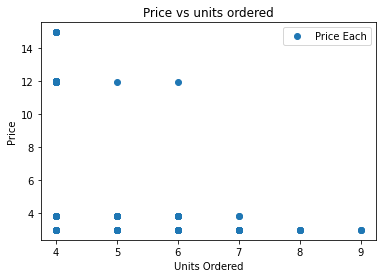

In [32]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df2.plot(x = 'Quantity Ordered', y='Price Each',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price vs units ordered')  
plt.xlabel('Units Ordered')  
plt.ylabel('Price')  
plt.show()

In [33]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df2['Quantity Ordered'].values.reshape(-1,1)
y = df2['Price Each'].values.reshape(-1,1)

In [34]:
X

array([[5.],
       [4.],
       [7.],
       ...,
       [4.],
       [5.],
       [4.]])

In [35]:
y

array([[2.99],
       [2.99],
       [2.99],
       ...,
       [2.99],
       [3.84],
       [2.99]])

In [36]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [37]:
### 4. Regression Analysis

# Create regression object
regression = LinearRegression()

In [38]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [39]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

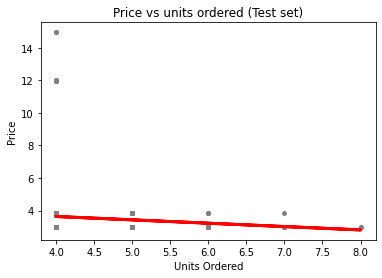

In [40]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs units ordered (Test set)')
plot_test.xlabel('Units Ordered')
plot_test.ylabel('Price')
plot_test.show()

In [41]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [42]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.20615658]]
Mean squared error:  2.18520847037317
R2 score:  0.009219318794515208


#### When looking at number of units greater than or equal to 4 the linier regression fits a lot better   
#### Even though the R score is still low you can see from the plot the the corrilation between cost and units ordered does exist

### Regression on df of quantity ordered 3 and lower

In [43]:
df3 = df[df['Quantity Ordered']<4]
df3

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order_date_&_time,Town,Zip code,State,hour,Date,Pricing Category,Total_units
0,1,141234.0,iPhone,1.0,700.00,01/22/19 21:25,Boston,2215.0,Massachusetts,21.0,2019-01-22,Mid-Priced,22528.0
1,2,141235.0,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,Portland,97035.0,Oregon,14.0,2019-01-28,Low-priced,11303.0
2,3,141236.0,Wired Headphones,2.0,11.99,01/17/19 13:33,San Francisco,94016.0,California,13.0,2019-01-17,Low-priced,83528.0
3,4,141237.0,27in FHD Monitor,1.0,149.99,01/05/2019 20:33,Los Angeles,90001.0,California,20.0,2019-01-05,Low-priced,83528.0
4,5,141238.0,Wired Headphones,1.0,11.99,01/25/19 11:59,Austin,73301.0,Texas,11.0,2019-01-25,Low-priced,27883.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,185946,319666.0,Lightning Charging Cable,1.0,14.95,12/11/2019 20:58,San Francisco,94016.0,California,20.0,2019-12-11,Low-priced,83528.0
185946,185947,319667.0,AA Batteries (4-pack),2.0,3.84,12/01/2019 12:01,Los Angeles,90001.0,California,12.0,2019-12-01,Low-priced,83528.0
185947,185948,319668.0,Vareebadd Phone,1.0,400.00,12/09/2019 06:43,Seattle,98101.0,Washington,6.0,2019-12-09,Low-priced,16553.0
185948,185949,319669.0,Wired Headphones,1.0,11.99,12/03/2019 10:39,Dallas,75001.0,Texas,10.0,2019-12-03,Low-priced,27883.0


In [44]:
df3.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Zip code,hour,Total_units
count,184796.000000,184796.000000,184796.000000,184796.000000,184796.000000,184796.000000,184796.000000
mean,92967.246450,230409.645869,1.103704,185.529273,63874.620998,14.414955,46531.434328
std,53680.801943,51514.187247,0.352920,333.460481,37775.210129,5.423574,30601.280654
min,1.000000,141234.000000,1.000000,2.990000,2215.000000,0.000000,2750.000000
25%,46473.750000,185816.750000,1.000000,11.950000,10001.000000,11.000000,22528.000000
50%,92957.500000,230350.500000,1.000000,14.950000,90001.000000,15.000000,27932.000000
75%,139455.250000,275029.250000,1.000000,150.000000,94016.000000,19.000000,83528.000000
max,185950.000000,319670.000000,3.000000,1700.000000,98101.000000,23.000000,83528.000000


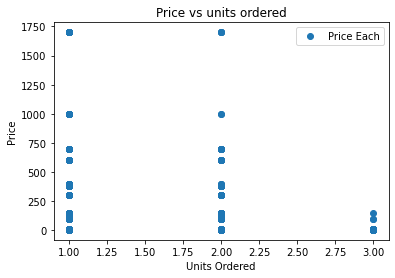

In [45]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df3.plot(x = 'Quantity Ordered', y='Price Each',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price vs units ordered')  
plt.xlabel('Units Ordered')  
plt.ylabel('Price')  
plt.show()

In [46]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df3['Quantity Ordered'].values.reshape(-1,1)
y = df3['Price Each'].values.reshape(-1,1)

In [47]:
X

array([[1.],
       [1.],
       [2.],
       ...,
       [1.],
       [1.],
       [1.]])

In [48]:
y

array([[700.  ],
       [ 14.95],
       [ 11.99],
       ...,
       [400.  ],
       [ 11.99],
       [ 99.99]])

In [49]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [50]:
### 4. Regression Analysis

# Create regression object
regression = LinearRegression()

In [51]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [52]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

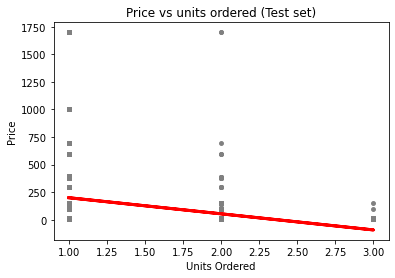

In [53]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs units ordered (Test set)')
plot_test.xlabel('Units Ordered')
plot_test.ylabel('Price')
plot_test.show()

In [54]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [55]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-145.8583437]]
Mean squared error:  109837.42977921083
R2 score:  0.023720547330471242


#### When looking at number of units bought less than 4 the linier regression fits a lot better   
#### Lokking at this as a single data set doesn't seem to show much corrilation but once you have divided it into higher and lower quantities ordered there is a much better corrilation . 

### Hypothesis 2:  As the price of an item goes up the total sales of that item will reduce.

In [57]:
df3.rename(columns={"Total_units":"Total_units_per_state"},inplace=True)
print(df3.head())

   Unnamed: 0  Order ID                   Product  Quantity Ordered  \
0           1  141234.0                    iPhone               1.0   
1           2  141235.0  Lightning Charging Cable               1.0   
2           3  141236.0          Wired Headphones               2.0   
3           4  141237.0          27in FHD Monitor               1.0   
4           5  141238.0          Wired Headphones               1.0   

   Price Each Order_date_&_time            Town  Zip code          State  \
0      700.00    01/22/19 21:25          Boston    2215.0  Massachusetts   
1       14.95    01/28/19 14:15        Portland   97035.0         Oregon   
2       11.99    01/17/19 13:33   San Francisco   94016.0     California   
3      149.99  01/05/2019 20:33     Los Angeles   90001.0     California   
4       11.99    01/25/19 11:59          Austin   73301.0          Texas   

   hour        Date Pricing Category  Total_units_per_state  
0  21.0  2019-01-22       Mid-Priced                22

C:\Users\Hello\AppData\Local\Temp\ipykernel_9156\1060025999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.rename(columns={"Total_units":"Total_units_per_state"},inplace=True)


In [58]:
df3['Total_units_bought'] = df3.groupby(['Product'])['Quantity Ordered'].transform(np.sum)

C:\Users\Hello\AppData\Local\Temp\ipykernel_9156\3968751863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Total_units_bought'] = df3.groupby(['Product'])['Quantity Ordered'].transform(np.sum)


In [59]:
df3

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order_date_&_time,Town,Zip code,State,hour,Date,Pricing Category,Total_units_per_state,Total_units_bought
0,1,141234.0,iPhone,1.0,700.00,01/22/19 21:25,Boston,2215.0,Massachusetts,21.0,2019-01-22,Mid-Priced,22528.0,6849.0
1,2,141235.0,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,Portland,97035.0,Oregon,14.0,2019-01-28,Low-priced,11303.0,23189.0
2,3,141236.0,Wired Headphones,2.0,11.99,01/17/19 13:33,San Francisco,94016.0,California,13.0,2019-01-17,Low-priced,83528.0,20505.0
3,4,141237.0,27in FHD Monitor,1.0,149.99,01/05/2019 20:33,Los Angeles,90001.0,California,20.0,2019-01-05,Low-priced,83528.0,7550.0
4,5,141238.0,Wired Headphones,1.0,11.99,01/25/19 11:59,Austin,73301.0,Texas,11.0,2019-01-25,Low-priced,27883.0,20505.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,185946,319666.0,Lightning Charging Cable,1.0,14.95,12/11/2019 20:58,San Francisco,94016.0,California,20.0,2019-12-11,Low-priced,83528.0,23189.0
185946,185947,319667.0,AA Batteries (4-pack),2.0,3.84,12/01/2019 12:01,Los Angeles,90001.0,California,12.0,2019-12-01,Low-priced,83528.0,26180.0
185947,185948,319668.0,Vareebadd Phone,1.0,400.00,12/09/2019 06:43,Seattle,98101.0,Washington,6.0,2019-12-09,Low-priced,16553.0,2068.0
185948,185949,319669.0,Wired Headphones,1.0,11.99,12/03/2019 10:39,Dallas,75001.0,Texas,10.0,2019-12-03,Low-priced,27883.0,20505.0


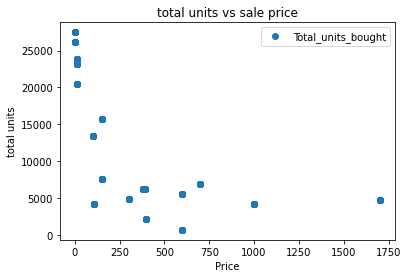

In [61]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df3.plot(x = 'Price Each', y='Total_units_bought',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('total units vs sale price')  
plt.xlabel('Price')  
plt.ylabel('total units')  
plt.show()

In [63]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df3['Price Each'].values.reshape(-1,1)
y = df3['Total_units_bought'].values.reshape(-1,1)

In [64]:
X

array([[700.  ],
       [ 14.95],
       [ 11.99],
       ...,
       [400.  ],
       [ 11.99],
       [ 99.99]])

In [65]:
y

array([[ 6849.],
       [23189.],
       [20505.],
       ...,
       [ 2068.],
       [20505.],
       [13457.]])

In [66]:
# Split data into a training set and a test set.  Using test_train_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =0)

#### Regression Analysis

In [67]:
regression.fit(X_train, y_train)

LinearRegression()

In [68]:
y_predicted = regression.predict(X_test)

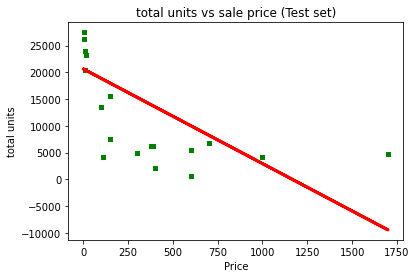

In [69]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('total units vs sale price (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('total units')
plot_test.show()

In [70]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [71]:
# Check summary stats
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-17.72032283]]
Mean squared error:  37394913.833750226
R2 score:  0.4808835288188288


In [72]:
# Create a dataframe comparing the actual and predicted values of y.

data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,379.99,197.588359
1,389.99,197.588359
2,11.99,197.588359
3,3.84,197.588359
4,99.99,197.588359
5,99.99,197.588359
6,11.95,197.588359
7,300.00,197.588359
8,150.00,197.588359
9,11.95,197.588359


#### You can see that the R value is a lot closer to 1 meaning there is a higher colilation between the total number of units and the sale price

#### Try less than $150

In [73]:
df4=df3[df3['Price Each']<=150]

In [74]:
df4.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order_date_&_time,Town,Zip code,State,hour,Date,Pricing Category,Total_units_per_state,Total_units_bought
1,2,141235.0,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,Portland,97035.0,Oregon,14.0,2019-01-28,Low-priced,11303.0,23189.0
2,3,141236.0,Wired Headphones,2.0,11.99,01/17/19 13:33,San Francisco,94016.0,California,13.0,2019-01-17,Low-priced,83528.0,20505.0
3,4,141237.0,27in FHD Monitor,1.0,149.99,01/05/2019 20:33,Los Angeles,90001.0,California,20.0,2019-01-05,Low-priced,83528.0,7550.0
4,5,141238.0,Wired Headphones,1.0,11.99,01/25/19 11:59,Austin,73301.0,Texas,11.0,2019-01-25,Low-priced,27883.0,20505.0
5,6,141239.0,AAA Batteries (4-pack),1.0,2.99,01/29/19 20:22,San Francisco,94016.0,California,20.0,2019-01-29,Low-priced,83528.0,27492.0


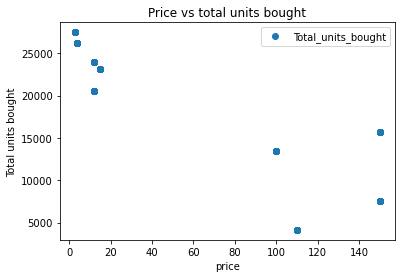

In [75]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df4.plot(x = 'Price Each', y='Total_units_bought',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price vs total units bought')  
plt.xlabel('price')  
plt.ylabel('Total units bought')  
plt.show()

In [78]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df4['Price Each'].values.reshape(-1,1)
y = df4['Total_units_bought'].values.reshape(-1,1)

In [79]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [80]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [81]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

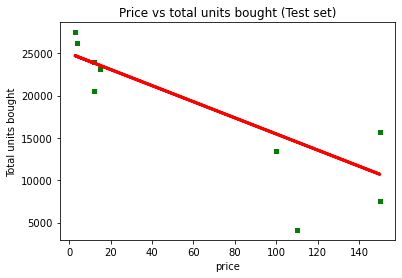

In [83]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs total units bought (Test set)')
plot_test.xlabel('price')
plot_test.ylabel('Total units bought')
plot_test.show()

In [84]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-95.21672279]]
Mean squared error:  9664007.537170218
R2 score:  0.744780904894757


#### As you can see once you limit the stock to less than $150 then the R score moves even closer to 1 making the corrilation good and a model you could build a predictove analysis from 